In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
#from sklearn.metrics import r2_score
from scipy.stats import ks_2samp
import seaborn as sns


In [2]:
PINT = pd.read_csv('PINTv811.csv')
PINT

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QSTAT,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI
0,1,1,1,Joshua Hotaka Yama,36.800,139.200,1.80,0.20,K-Ar,Asia,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,2,Aragats,41.000,45.000,1.00,1.00,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2,Stepanavan,41.000,46.000,2.60,0.80,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5,4,Anahola 05,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,5,6,4,Anahola 07,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,4655,NaN,783,CR03,10.571,-85.687,130.00,2.25,Ar/Ar,North America,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
4644,4656,NaN,783,CR05,10.589,-85.680,112.40,0.45,Ar/Ar,North America,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
4645,4657,NaN,783,CR06,10.588,-85.679,112.40,0.45,Ar/Ar,North America,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
4646,4658,NaN,783,CR14,10.550,-85.707,135.10,0.75,Ar/Ar,North America,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0


In [3]:
GPTS = pd.read_csv('GPTS.csv')
GPTS

,start of normal chron,end of normal chron
0,0.000,0.780
1,0.990,1.070
2,1.770,1.950
3,2.140,2.150
4,2.581,3.040
...,...,...
88,71.071,71.338
89,71.587,73.004
90,73.291,73.374
91,73.619,79.075


In [4]:
GPTS['chron length'] = GPTS.apply(
    lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)

In [5]:
def combine_VDM(row):
    if pd.isna(row['VDM']) == False :
        return row['VDM']
    elif pd.isna(row['VADM']) == False :
        return row['VADM']
    else:
        return row['VDM/VADM']
PINT['allVDM'] = PINT.apply(lambda row: combine_VDM(row), axis=1)


In [6]:
def calc_rev_freq(lowerAgeLimit, upperAgeLimit, plot=True):
    
    GPTSselected = GPTS[(GPTS['end of normal chron']>=lowerAgeLimit) & (GPTS['start of normal chron']<=upperAgeLimit)]
    reversalList = GPTSselected['start of normal chron'].tolist() + GPTSselected['end of normal chron'].tolist()
    
    for item in reversalList.copy():
        if item < lowerAgeLimit or item > upperAgeLimit:
            reversalList.remove(item)
    
    gptsList = GPTSselected.drop('end of normal chron', axis=1)
    gptsList = list(gptsList.itertuples(index=False, name=None))
    #print(gptsList)
    if plot==True:
        fig, ax = plt.subplots(figsize=(18, 5))
        ax.broken_barh(gptsList, (0,1), facecolors='black')
        ax.get_yaxis().set_visible(False)
        ax.set_xlabel('Age (Ma)')
    
    reversalFreq = (len(reversalList)/(upperAgeLimit - lowerAgeLimit))
    print(f'({len(reversalList)}/({upperAgeLimit} - {lowerAgeLimit}))')
    print(reversalList)
    return reversalFreq

(12/(62 - 52))
[52.364, 52.757, 52.903, 55.904, 57.554, 60.92, 52.663, 52.801, 53.347, 56.391, 57.911, 61.276]


1.2

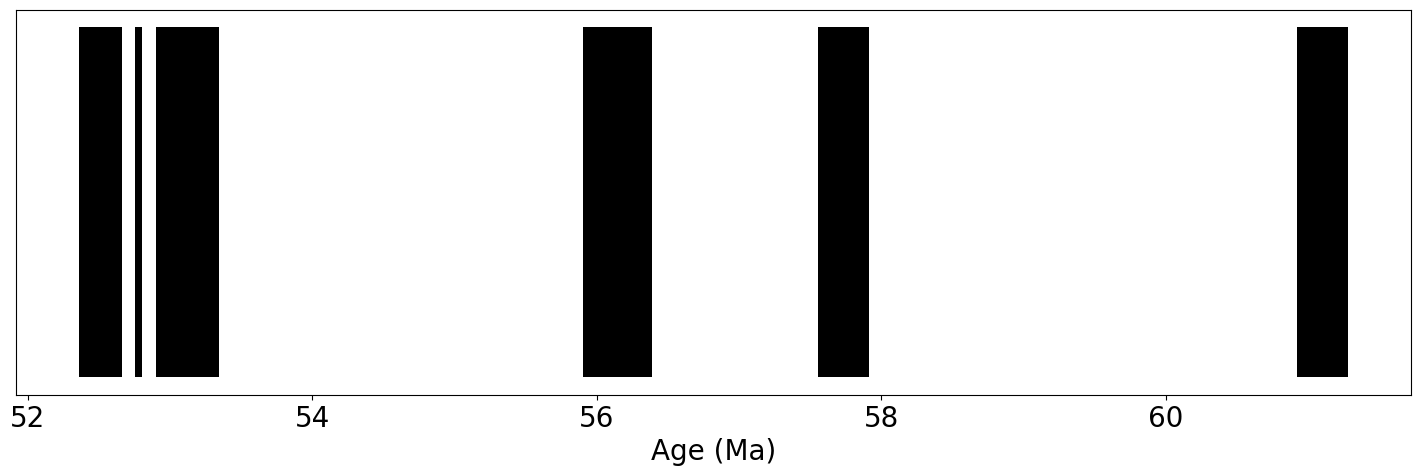

In [7]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
calc_rev_freq(52,62)

In [8]:
PINT

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
0,1,1,1,Joshua Hotaka Yama,36.800,139.200,1.80,0.20,K-Ar,Asia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.280702
1,2,2,2,Aragats,41.000,45.000,1.00,1.00,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.932283
2,3,3,2,Stepanavan,41.000,46.000,2.60,0.80,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.807257
3,4,5,4,Anahola 05,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.800000
4,5,6,4,Anahola 07,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,4655,NaN,783,CR03,10.571,-85.687,130.00,2.25,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,8.300000
4644,4656,NaN,783,CR05,10.589,-85.680,112.40,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,5.320000
4645,4657,NaN,783,CR06,10.588,-85.679,112.40,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,8.660000
4646,4658,NaN,783,CR14,10.550,-85.707,135.10,0.75,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,8.840000


4558 R 
R
4560 R 
R
4561 R 
R
4562 N 
N
4563 N 
N


,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
4607,4619,NaN,781,Lachman Mesa Flow 2,-63.848400,302.167900,5.04,0.04,radiometric,Antarctica,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,6.196400
4606,4618,NaN,781,Lachman Mesa Flow 1,-63.846800,302.166200,5.04,0.04,radiometric,Antarctica,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,5.515500
4225,4237,NaN,734,OK8,22.084877,200.354642,5.11,0.92,GPTS,Pacific Ocean,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.800000
4216,4228,NaN,734,OK23,22.087277,200.354028,5.11,0.92,GPTS,Pacific Ocean,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,4.100000
4220,4232,NaN,734,OK3,22.084877,200.354642,5.11,0.92,GPTS,Pacific Ocean,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2381,3081,209,Rajmahal RS17,24.150000,87.680000,117.60,0.80,Ar/Ar,Asia,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,9.352348
2378,2379,3079,209,Rajmahal RS07/08,24.390000,87.480000,117.60,0.80,Ar/Ar,Asia,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,12.516127
3551,3563,9108,672,Lava 4,40.830000,119.780000,119.30,1.20,Ar/Ar,Asia,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.922510
3550,3562,9107,672,Lava 3,40.830000,119.780000,119.30,1.20,Ar/Ar,Asia,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,3.908595


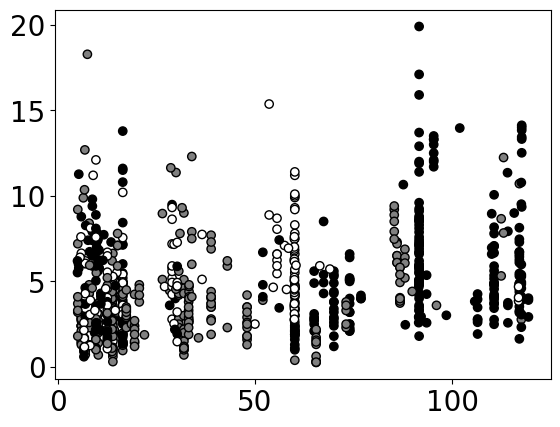

In [9]:
lowerAgeLimit = 5
upperAgeLimit = 120 #Ma
QPIfilter = 3 #QPI score must be greater than or equal to filter



GPTS['chron length'] = GPTS.apply(
    lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)



PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit)]

##Fix missing polarity values with filler
values = {"P": 'O'}
PINTselected = PINTselected.fillna(value=values)

for i in range(len(PINTselected)):
    pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
    if pol1 not in ['N' ,'R', 'T', 'O']:
        print (PINTselected.index[i], pol1)
        if pol1 =='N ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
        if pol1 =='R ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
        print(PINTselected.loc[PINTselected.index[i], 'P'])

colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

fig, ax = plt.subplots()
ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], c=PINTselected['P'].map(colors), edgecolors= "black")

PINTselected[(PINTselected.allVDM>=20)]

#PINTselected = PINTselected.drop(labels=[4651, 4652, 4653, 4656, 4657, 4659])

mean = PINTselected["allVDM"].mean()
mean

std = PINTselected["allVDM"].std()
std

PINTselected = PINTselected.sort_values(by=['AGE'])
PINTselected

In [10]:
revFreqs = []
ages = []
for age in range(5,121):
    lowerAgeLimit = age - 5
    upperAgeLimit = age + 5
    reversalFreq = calc_rev_freq(lowerAgeLimit, upperAgeLimit, plot=False)
    dictRev = {age: reversalFreq}
    revFreqs.append(reversalFreq)
    ages.append(age)


(47/(10 - 0))
[0.0, 0.99, 1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 0.78, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88]
(45/(11 - 1))
[1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949]
(47/(12 - 2))
[2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 11.052, 11.476, 11.935, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949, 11.099, 11.531]
(52/(13 - 3))
[3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.89

In [11]:
revFreqsdf = pd.DataFrame()
revFreqsdf['age'] = ages
revFreqsdf['reversal frequency'] = revFreqs
revFreqsdf.to_csv('reversalFreq.csv')
revFreqsdf

,age,reversal frequency
0,5,4.7
1,6,4.5
2,7,4.7
3,8,5.2
4,9,5.1
...,...,...
111,116,0.1
112,117,0.1
113,118,0.1
114,119,0.1


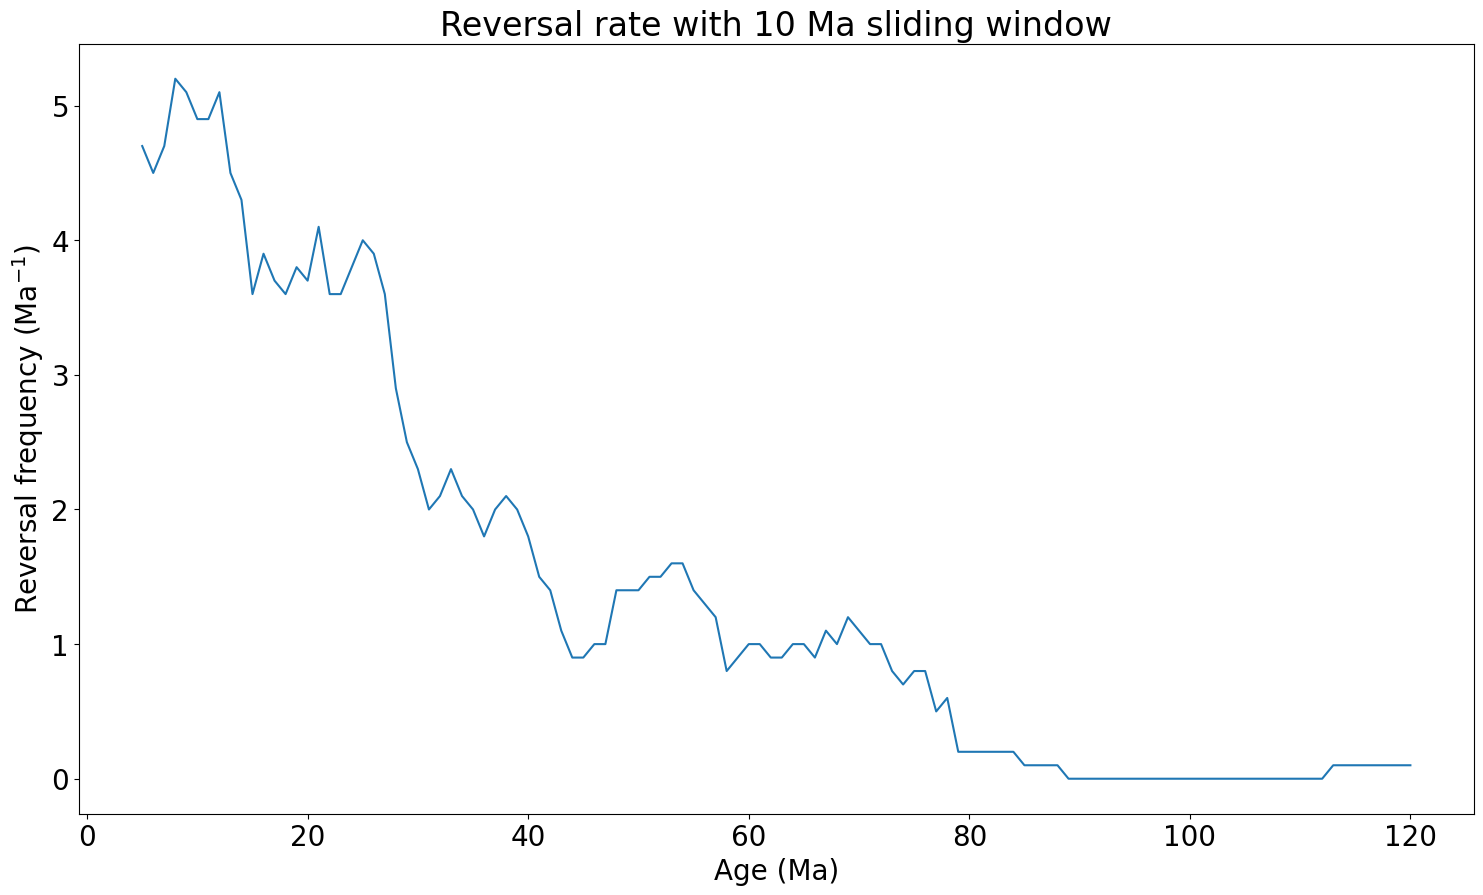

In [12]:
fig = plt.figure(figsize=(18, 10))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.plot(ages, revFreqs)
plt.title('Reversal rate with 10 Ma sliding window')
plt.xlabel('Age (Ma)')
plt.ylabel('Reversal frequency (Ma$^{-1}$)')
plt.show()

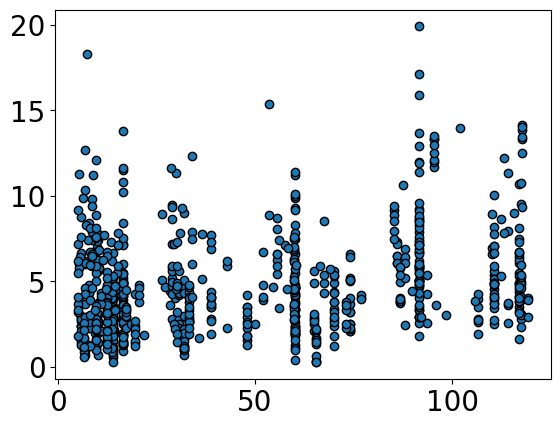

In [13]:
lowerAgeLimit = 5
upperAgeLimit = 120 #ma
QPIfilter = 3 #QPI score must be greater than or equal to filter


PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit) & (PINT['allVDM'].isna()==False)]

##Fix missing polarity values with filler
values = {"P": 'O'}
PINTselected = PINTselected.fillna(value=values)

for i in range(len(PINTselected)):
    pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
    if pol1 not in ['N' ,'R', 'T', 'O']:
        #print (PINTselected.index[i], pol1)
        if pol1 =='N ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
        if pol1 =='R ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
        #print(PINTselected.loc[PINTselected.index[i], 'P'])

colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

fig, ax = plt.subplots()
ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], edgecolors= "black")


In [14]:
PINTselected

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
16,17,9541,5,Achadzhur,41.0000,45.0000,86.00,4.00,Stratigraphy,Europe,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,6.5000
17,18,9540,5,Sarigyukh,41.0000,45.0000,86.00,4.00,Stratigraphy,Europe,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,7.3000
18,19,21,6,425,41.0000,45.0000,86.00,3.00,Stratigraphy,Europe,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,7.2000
19,20,22,6,499,41.0000,45.0000,86.00,3.00,Stratigraphy,Europe,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.1000
20,21,23,6,500,41.0000,45.0000,86.00,3.00,Stratigraphy,Europe,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,4624,NaN,781,Smellie Peak Scoria cone,-63.9303,302.0821,5.91,0.08,radiometric,Antarctica,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,7.6017
4639,4651,NaN,783,NC02,10.8560,-85.9440,113.00,1.75,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,7.8300
4640,4652,NaN,783,NC03,10.8540,-85.9260,113.00,1.75,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,12.2400
4644,4656,NaN,783,CR05,10.5890,-85.6800,112.40,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,5.3200


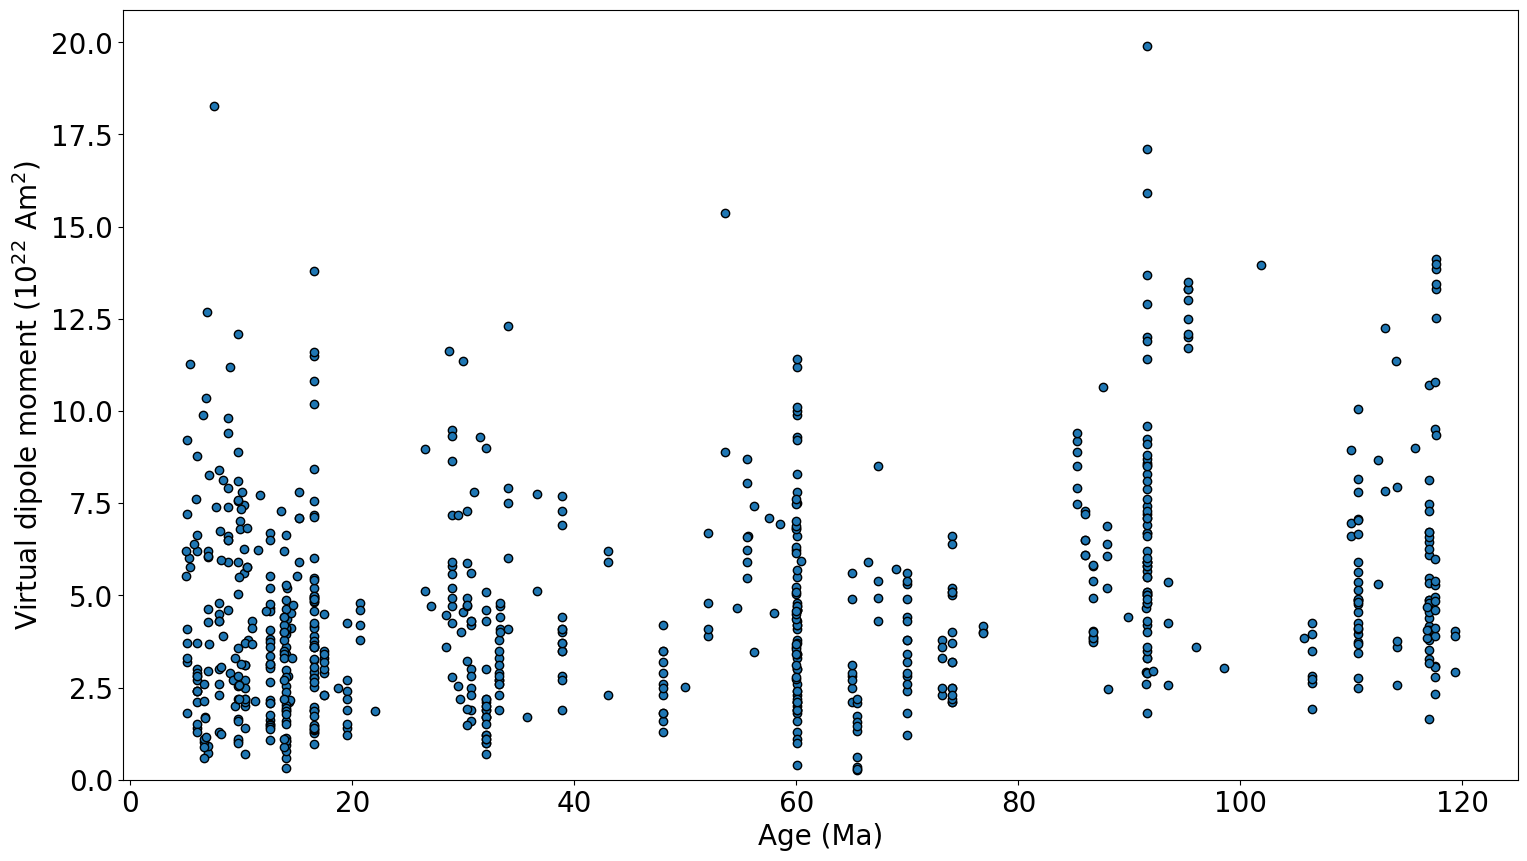

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))
scatter = ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], edgecolors="black")

ax.set_ylim(0, )
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')

plt.show()

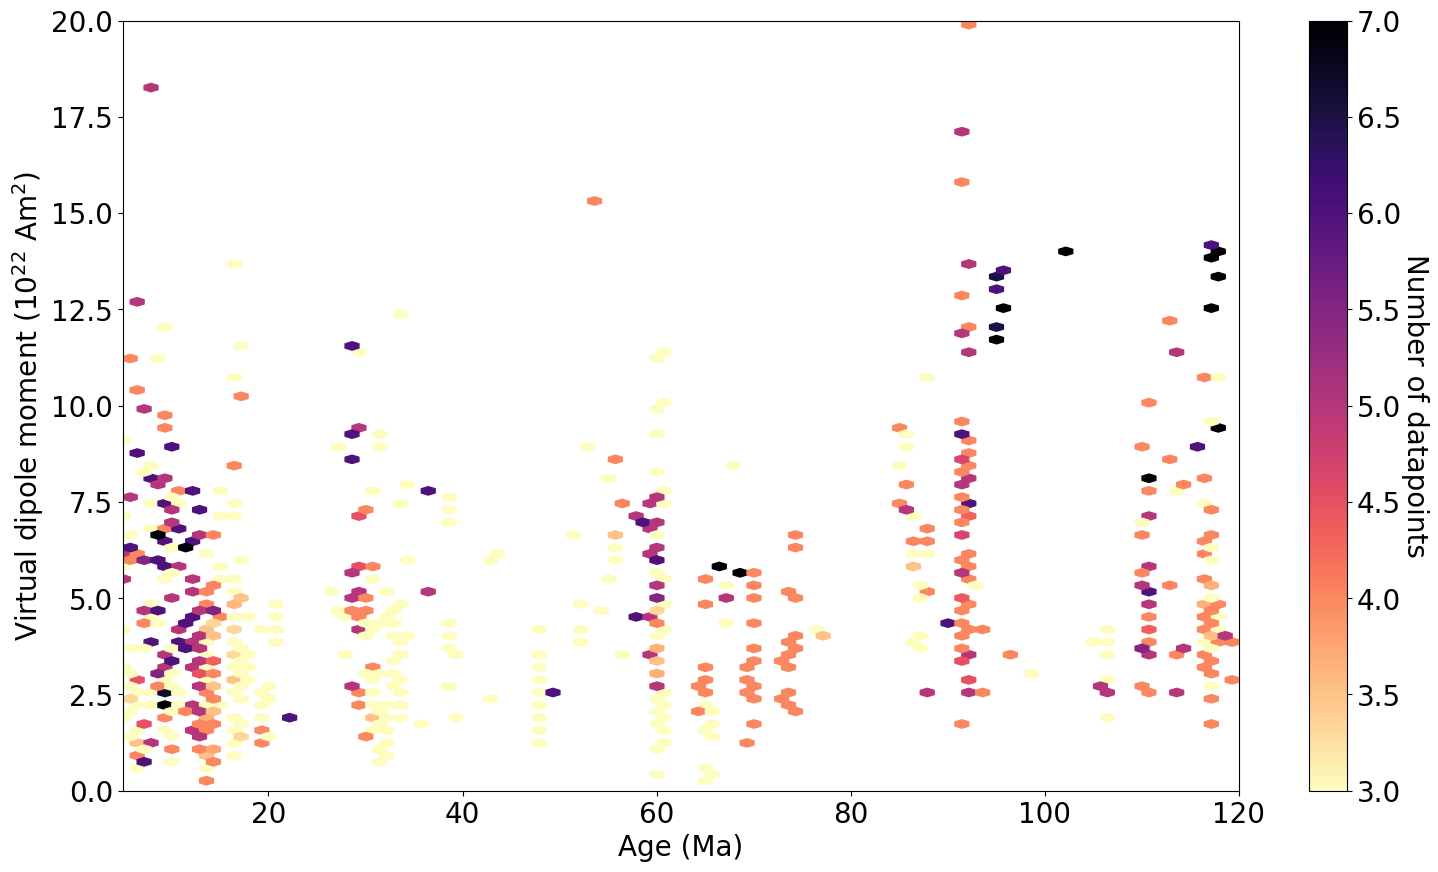

In [16]:
fig = plt.figure(figsize=(18, 10))
plt.hexbin(PINTselected['AGE'], PINTselected['allVDM'], C=PINTselected['QPI'],
           gridsize=(80,60), cmap=plt.cm.magma_r)
cbar = plt.colorbar()
cbar.set_label('Number of datapoints', rotation=270, labelpad=20)
plt.ylim(0,20)
plt.xlim(5, 120)
#plt.plot(myline, mymodel(myline), color = 'black')
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')
plt.show()

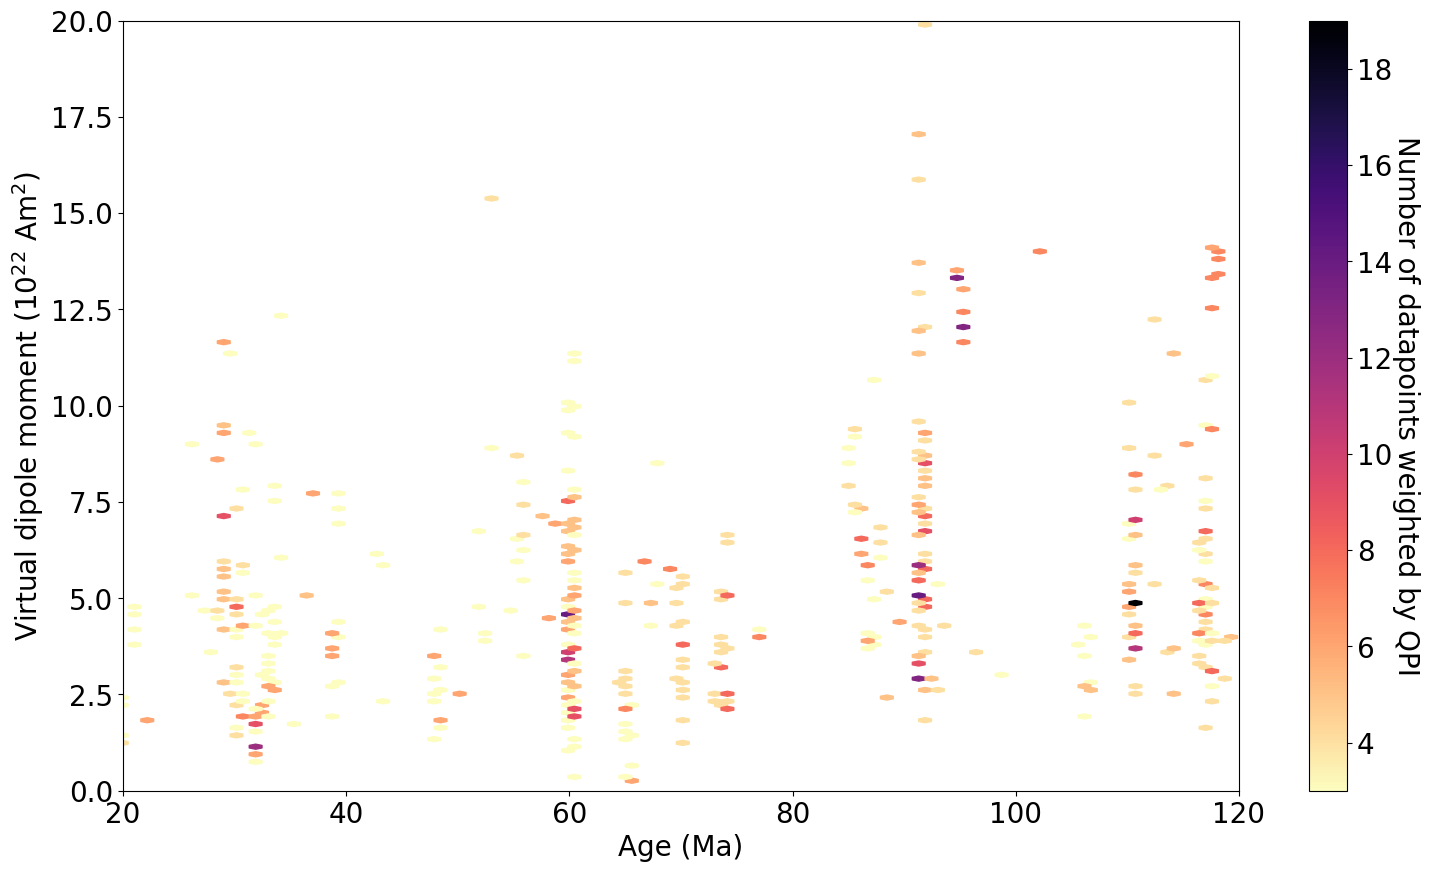

In [17]:
fig = plt.figure(figsize=(18, 10))
plt.hexbin(PINTselected['AGE'], PINTselected['allVDM'], C=PINTselected['QPI'], reduce_C_function=np.sum,
           gridsize=(100,100), cmap=plt.cm.magma_r)
cbar = plt.colorbar()
cbar.set_label('Number of datapoints weighted by QPI', rotation=270, labelpad=20)
plt.ylim(0, 20)
plt.xlim(20, 120)
#plt.plot(myline, mymodel(myline), color = 'black')
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')
plt.show()

In [18]:
MCADAM = pd.read_excel('mcadam-bono-et-al\\MCADAM_Bono_et_al\\MCADAMv1b.xlsx', index_col='timestep')
MCADAM

,age,mean,std,mode,2.5%,25%,50%,75%,97.5%
timestep,,,,,,,,,
0,0.055,6.264778,0.423396,6.207087,5.470196,5.979318,6.252689,6.541811,7.131056
1,0.105,6.479454,0.300689,6.477200,5.900301,6.274407,6.475441,6.680122,7.092323
2,0.155,6.028607,0.447652,5.936136,5.199389,5.713928,6.012255,6.320216,6.948601
3,0.205,7.475569,0.560026,7.400328,6.427980,7.091302,7.458524,7.836350,8.625885
4,0.255,7.002658,0.585351,6.891321,5.937833,6.594186,6.974337,7.377973,8.219330
...,...,...,...,...,...,...,...,...,...
73114,3655.755,1.705374,1.217865,0.859850,0.454667,0.843326,1.284755,2.224143,4.904380
73115,3655.805,1.705243,1.217849,0.859783,0.454663,0.842935,1.284755,2.224143,4.903335
73116,3655.855,1.705113,1.217833,0.859715,0.454658,0.842947,1.284755,2.224143,4.903326


In [19]:
MCADAMselected = MCADAM[(MCADAM.age>=lowerAgeLimit) & (MCADAM.age<=upperAgeLimit)]


In [20]:
len(MCADAMselected['50%'])

2300

In [21]:
len(MCADAMselected['age'])

2300

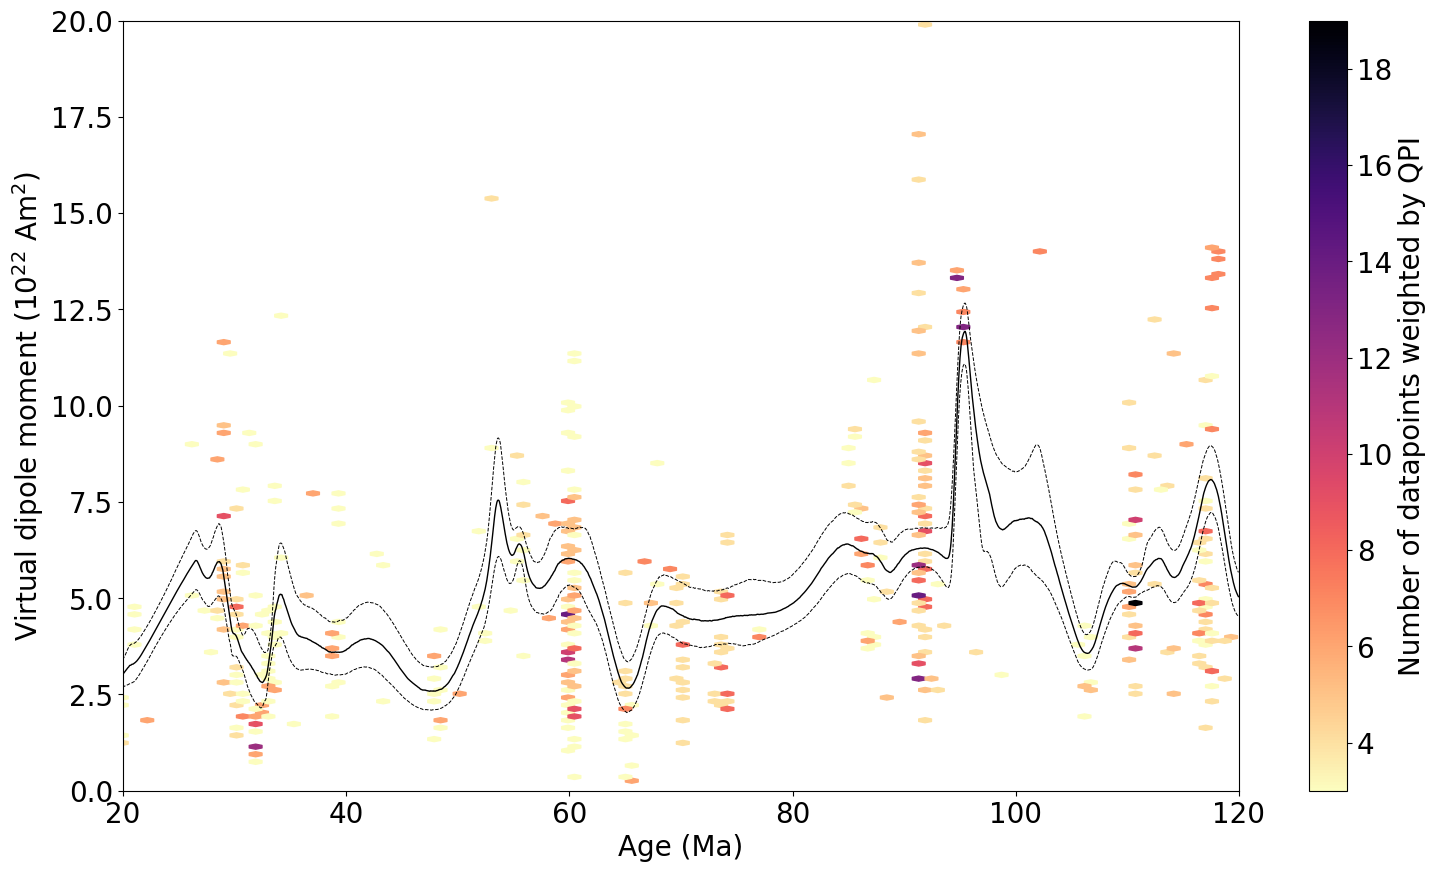

In [22]:
fig = plt.figure(figsize=(18, 10))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.hexbin(PINTselected['AGE'], PINTselected['allVDM'], C=PINTselected['QPI'], reduce_C_function=np.sum,
           gridsize=(100,100), cmap=plt.cm.magma_r)
plt.colorbar(label='Number of datapoints weighted by QPI')
plt.ylim(0, 20)
plt.xlim(20, 120)
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')
plt.plot(MCADAMselected.age, MCADAMselected['50%'], 'k-', linewidth=1)
plt.plot(MCADAMselected.age, MCADAMselected['25%'], 'k--', linewidth=0.7)
plt.plot(MCADAMselected.age, MCADAMselected['75%'], 'k--', linewidth=0.7)
plt.show()

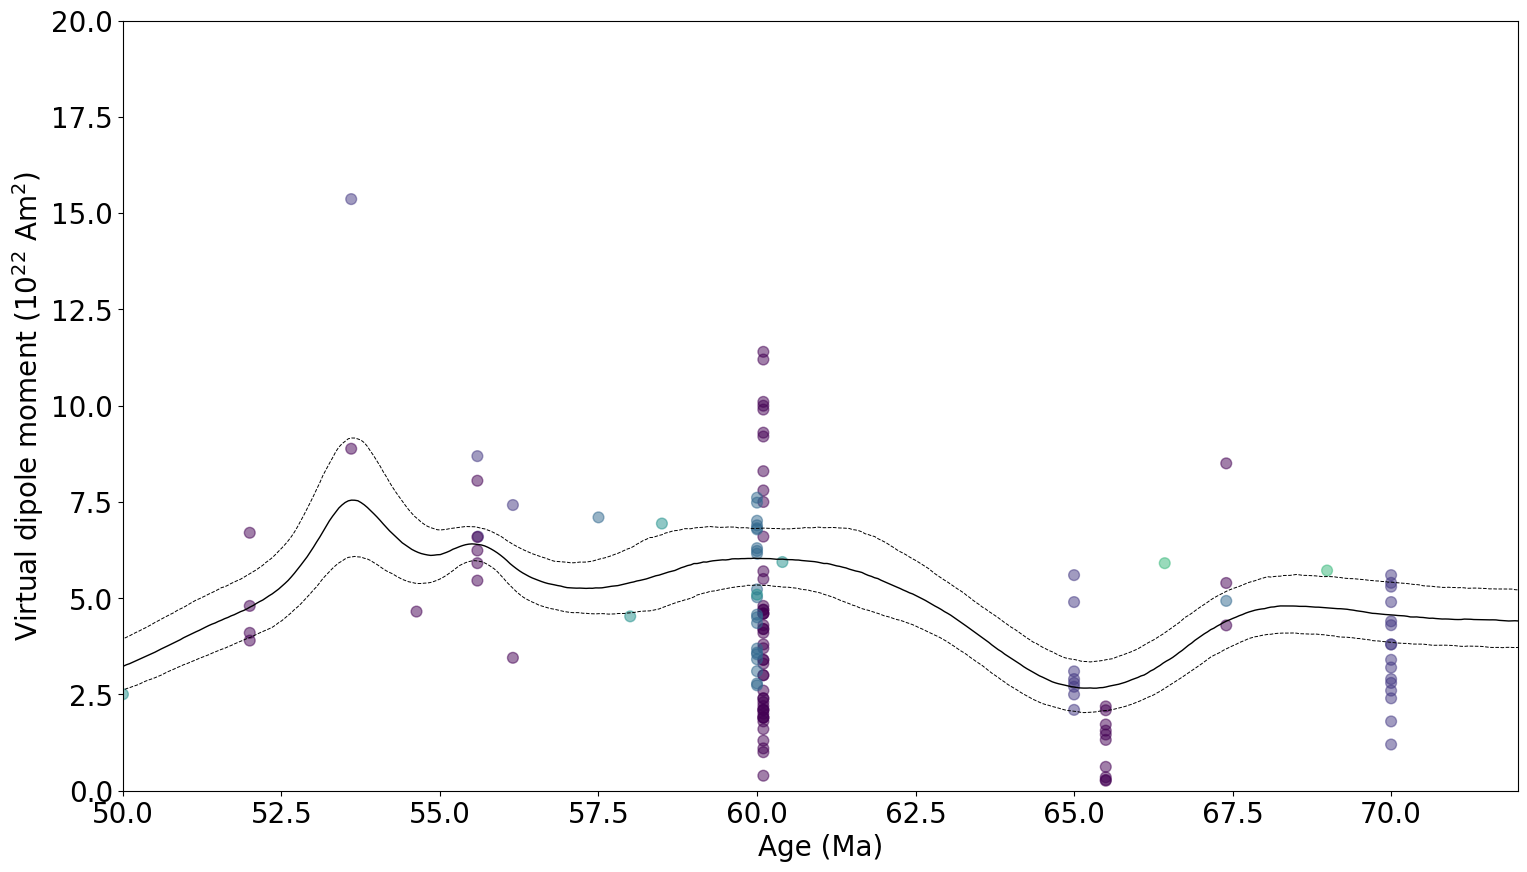

In [35]:
fig = plt.figure(figsize=(18, 10))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.scatter(PINTselected['AGE'], PINTselected['allVDM'], alpha=0.5, c=PINTselected['QPI'], s=60)
plt.ylim(0, 20)
plt.xlim(50, 72)
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')
plt.plot(MCADAMselected.age, MCADAMselected['50%'], 'k-', linewidth=1)
plt.plot(MCADAMselected.age, MCADAMselected['25%'], 'k--', linewidth=0.7)
plt.plot(MCADAMselected.age, MCADAMselected['75%'], 'k--', linewidth=0.7)
plt.show()

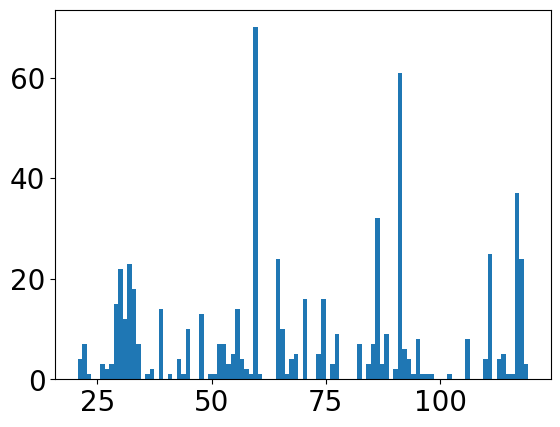

In [48]:
plt.hist(PINTselected['AGE'], bins = 100)
plt.show() 

In [23]:
ages

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120]

In [24]:
MCADAMresampled = pd.DataFrame()

for age in ages:
    MCADAMlessthan = MCADAM[MCADAM['age'] < age]
    max_value_row = MCADAMlessthan.loc[MCADAMlessthan['age'].idxmax()]
    
    MCADAMmorethan = MCADAM[MCADAM['age'] > age]
    min_value_row = MCADAMmorethan.loc[MCADAMmorethan['age'].idxmin()]
    
    averaged_row = (age - max_value_row['age'])/(min_value_row['age']-max_value_row['age'])*(min_value_row - max_value_row)+max_value_row

    MCADAMresampled = MCADAMresampled.append(averaged_row, ignore_index=True)



C:\Users\murray98\AppData\Local\Temp\ipykernel_924\922627735.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCADAMresampled = MCADAMresampled.append(averaged_row, ignore_index=True)


In [25]:
MCADAMresampled['reversal frequency'] =revFreqs

In [26]:
MCADAMresampled

,age,mean,std,mode,2.5%,25%,50%,75%,97.5%,reversal frequency
0,5.0,6.091159,1.697039,5.557860,3.340229,4.958880,5.879648,6.990114,10.107989,4.7
1,6.0,3.304801,1.019385,3.100179,1.697280,2.558490,3.189723,3.899024,5.614101,4.5
2,7.0,4.978050,1.894162,4.103968,2.094148,3.618894,4.705904,6.043961,9.420669,4.7
3,8.0,4.769310,1.377647,4.336818,2.369278,3.841203,4.654071,5.559996,7.782433,5.2
4,9.0,5.486009,1.376654,5.290203,3.057050,4.553121,5.391953,6.293063,8.485850,5.1
...,...,...,...,...,...,...,...,...,...,...
111,116.0,6.689104,1.370494,6.501018,4.277314,5.724741,6.605460,7.554738,9.635508,0.1
112,117.0,7.888227,1.350607,7.988682,5.307705,6.972198,7.867069,8.745856,10.591015,0.1
113,118.0,7.847514,1.288618,7.818202,5.365167,6.982995,7.820938,8.683556,10.461651,0.1
114,119.0,6.251529,1.185385,6.115381,4.174071,5.416732,6.169139,6.989800,8.786231,0.1


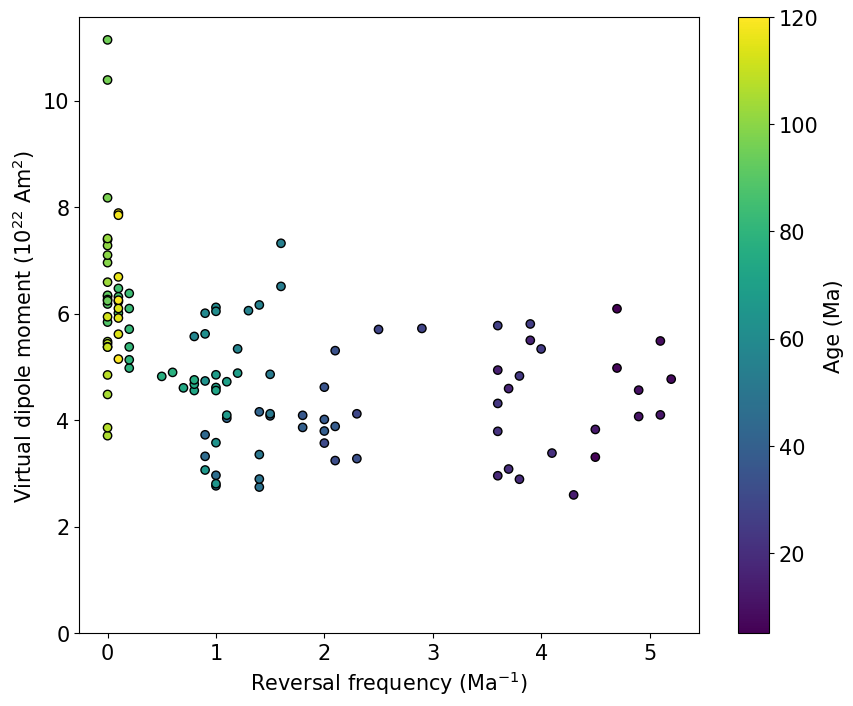

In [35]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
scat = ax.scatter(MCADAMresampled["reversal frequency"], MCADAMresampled["mean"], edgecolors="k", c=MCADAMresampled.age, zorder=10)
ax.set_xlabel('Reversal frequency (Ma$^{-1}$)')
ax.set_ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')
plt.ylim(0,)
cbar = plt.colorbar(scat)
cbar.set_label('Age (Ma)')
plt.show()

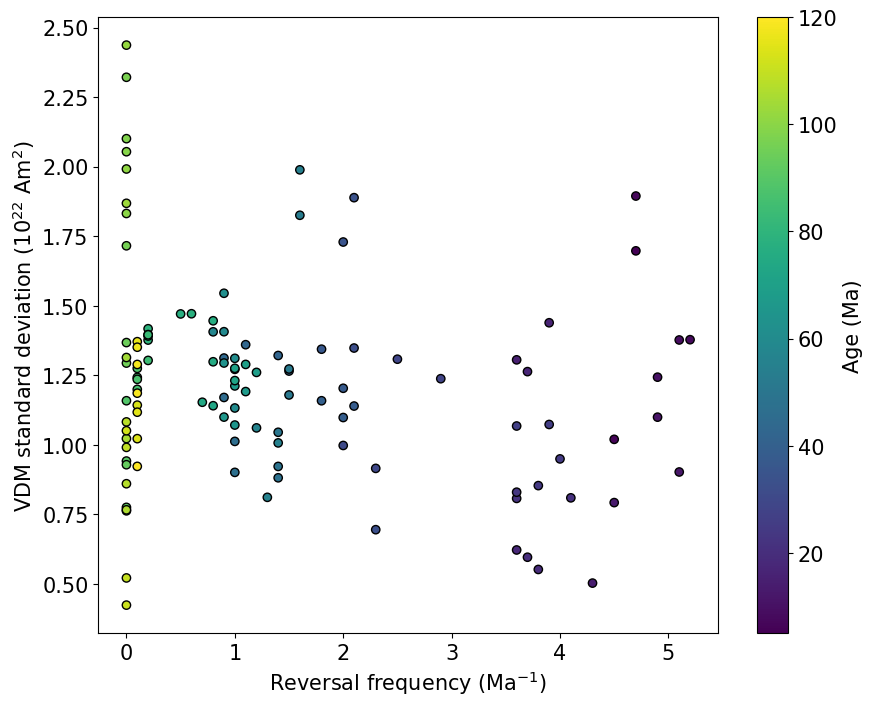

In [83]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
scat = ax.scatter(MCADAMresampled["reversal frequency"], MCADAMresampled["std"], edgecolors="k", c=MCADAMresampled.age, zorder=10)
ax.set_xlabel('Reversal frequency (Ma$^{-1}$)')
ax.set_ylabel('VDM standard deviation ($10^{22}$ Am$^2$)')
cbar = plt.colorbar(scat)
cbar.set_label('Age (Ma)')
plt.show()

(185/(100 - 0))
[0.0, 0.99, 1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 11.052, 11.476, 11.935, 12.184, 12.678, 12.775, 12.991, 13.302, 13.703, 14.178, 14.8, 15.034, 16.014, 16.327, 16.556, 17.277, 18.281, 19.048, 20.518, 20.996, 21.768, 22.151, 22.459, 22.588, 22.804, 23.353, 23.677, 23.999, 24.73, 24.835, 25.496, 25.823, 25.992, 27.027, 28.283, 28.578, 29.401, 29.765, 30.479, 33.058, 34.655, 35.343, 35.685, 36.618, 37.604, 37.92, 38.426, 39.631, 41.257, 42.536, 46.264, 49.037, 50.778, 51.047, 52.364, 52.757, 52.903, 55.904, 57.554, 60.92, 62.499, 63.976, 65.578, 67.735, 71.071, 71.587, 73.291, 73.619, 83.0, 0.78, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949, 11.099, 11.531, 12.078, 12.401, 12.708, 12.819, 13.139, 13.51, 14.076, 14.612, 14.888, 15.155, 16.293, 16.488, 16.726, 17.615, 18.7

1.85

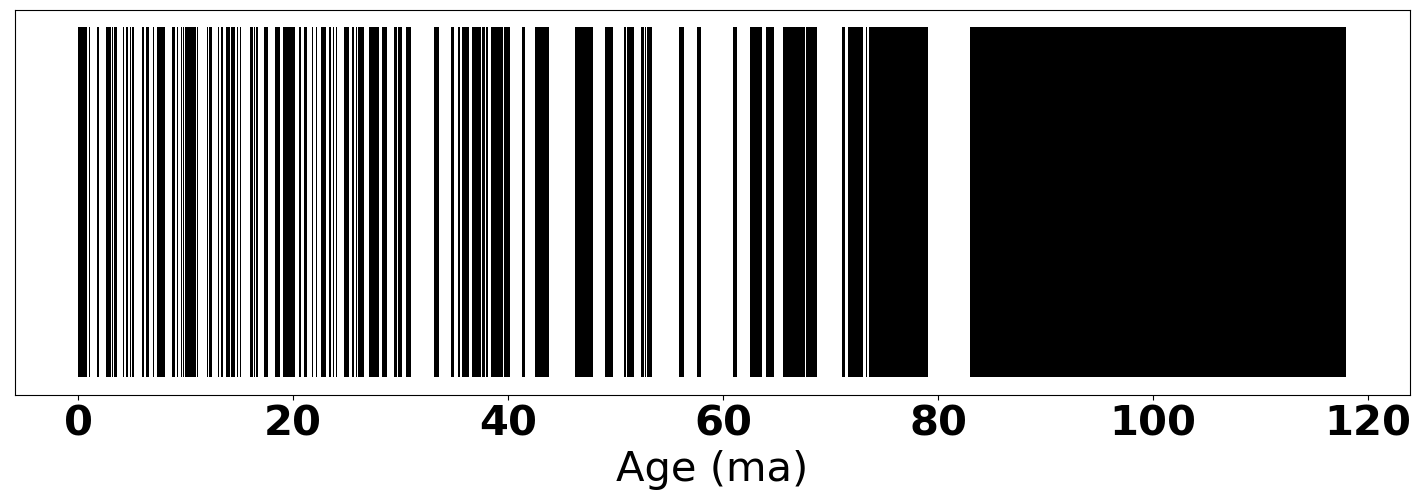

In [83]:
calc_rev_freq(0, 100)

    start of normal chron  end of normal chron
24                 11.052               11.099
25                 11.476               11.531
26                 11.935               12.078
27                 12.184               12.401
28                 12.678               12.708
29                 12.775               12.819
30                 12.991               13.139
31                 13.302               13.510
32                 13.703               14.076
33                 14.178               14.612
34                 14.800               14.888
35                 15.034               15.155
36                 16.014               16.293
37                 16.327               16.488
38                 16.556               16.726
39                 17.277               17.615
40                 18.281               18.781
    start of normal chron  end of normal chron  chron length
24                 11.052               11.099         0.047
25                 11.476       

C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(
C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(
C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo


    start of normal chron  end of normal chron
88                 71.071               71.338
89                 71.587               73.004
90                 73.291               73.374
91                 73.619               79.075
    start of normal chron  end of normal chron  chron length
88                 71.071               71.338         0.267
89                 71.587               73.004         1.417
90                 73.291               73.374         0.083
91                 73.619               79.075         5.456


C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(


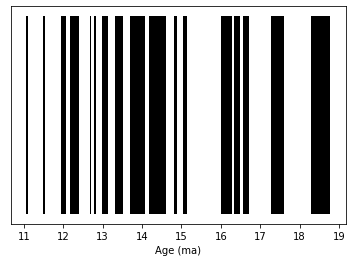

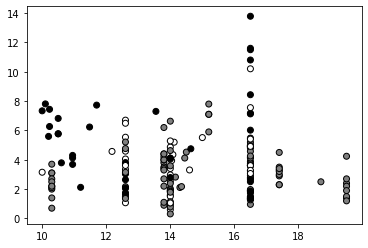

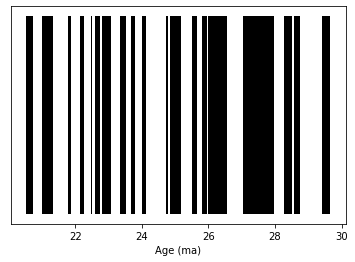

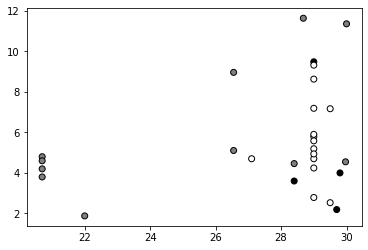

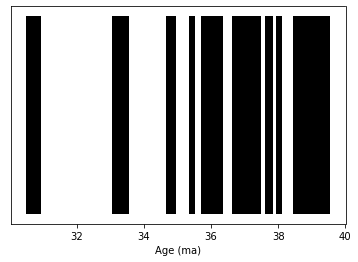

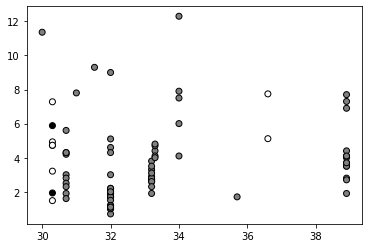

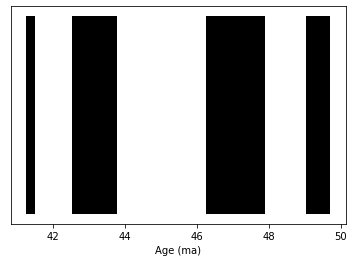

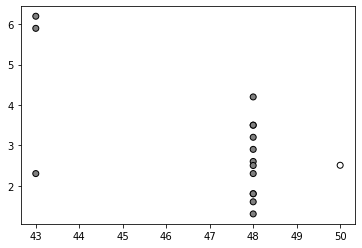

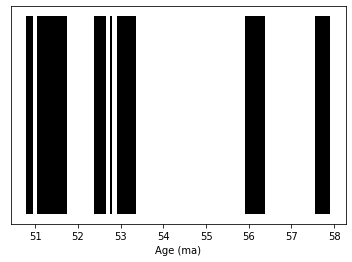

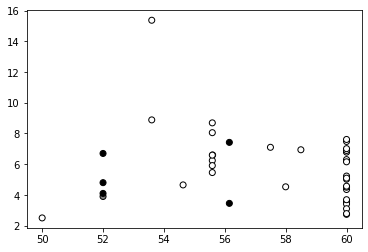

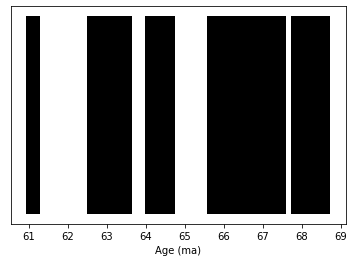

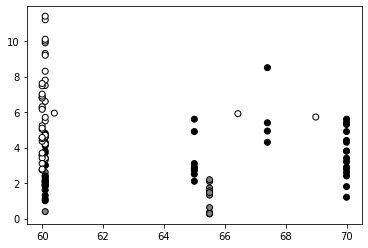

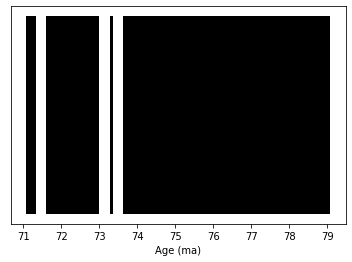

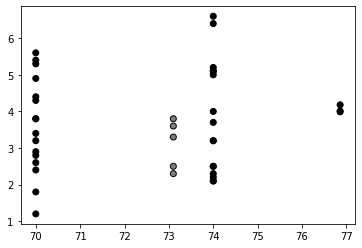

In [49]:
for runNumber in [1,2,3,4,5,6,7]:

    lowerAgeLimit = 10*runNumber #ma
    upperAgeLimit = 10*(runNumber+1) #ma
    QPIfilter = 3 #QPI score must be greater than or equal to filter


    GPTSselected = GPTS[(GPTS['start of normal chron']>=lowerAgeLimit) & (GPTS['end of normal chron']<=upperAgeLimit)]
    print(GPTSselected)
    GPTSselected['chron length'] = GPTSselected.apply(
        lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)

    print(GPTSselected)
    gptsList = GPTSselected.drop('end of normal chron', axis=1)
    gptsList = list(gptsList.itertuples(index=False, name=None))

    fig, ax = plt.subplots()
    #ax.set_axis_off()
    ax.broken_barh(gptsList, (0,1), facecolors='black')
    ax.get_yaxis().set_visible(False)
    ax.set_xlabel('Age (ma)')

    reversalFreq = (len(GPTSselected)/(upperAgeLimit- lowerAgeLimit))*2 #list is just list of normal chrons start times

    PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit)]

    ##Fix missing polarity values with filler
    values = {"P": 'O'}
    PINTselected = PINTselected.fillna(value=values)

    for i in range(len(PINTselected)):
        pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
        if pol1 not in ['N' ,'R', 'T', 'O']:
            print (PINTselected.index[i], pol1)
            if pol1 =='N ':
                PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
            if pol1 =='R ':
                PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
            print(PINTselected.loc[PINTselected.index[i], 'P'])

    colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

    fig, ax = plt.subplots()
    ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], c=PINTselected['P'].map(colors), edgecolors= "black")

    PINTselected[(PINTselected.allVDM>=20)]

    #PINTselected = PINTselected.drop(labels=[4651, 4652, 4653, 4656, 4657, 4659])

    mean = PINTselected["allVDM"].mean()
    mean

    std = PINTselected["allVDM"].std()
    std

    PINTselected = PINTselected.sort_values(by=['AGE'])
    PINTselected

    ## The polarity record in PINT is not good enough to calculate reversal rate
    # reversalTimes = []
    # countReversals = 0
    # for i in range(len(PINTselected)-1):
    #     pol1 = PINTselected.loc[PINTselected.index[i], 'P']    
    #     pol2 = PINTselected.loc[PINTselected.index[i+1], 'P']

    #     while (pol1 == 'O' or pol1 == 'T'): #transistional or non-reported directions
    #         #print('No polarity reported for: ', i)
    #         i-=1 
    #         #print('huh ', i)
    #         pol1 = PINTselected.loc[PINTselected.index[i], 'P']
    #         #print(pol1, i)

    #     if (pol1=='R'and pol2=='N') or (pol1=='N'and pol2=='R'):
    #         countReversals+=1
    #         #print('Reversal at: ', i)
    #         reversalTimes.append(PINTselected.loc[PINTselected.index[i+1], 'AGE'])
    # print('Number of reversals: ', countReversals)

    # reversals = []
    # for i in range(0,(len(reversalTimes) -1),2):
    #     reversal = (reversalTimes[i], reversalTimes[i+1]-reversalTimes[i])
    #     reversals.append(reversal)
    # fig, ax = plt.subplots()
    # ax.broken_barh(reversals, (0,1), facecolors='black')
    # ax.get_yaxis().set_visible(False)

    PINTdata = {
      "lower age limit": lowerAgeLimit,
      "upper age limit": upperAgeLimit,
      "mean": mean,
        "std": std,
        "Reversal rate": reversalFreq
    }
    PINTdata

    resultsName = f"PINTdata_{runNumber}.json"
    with open(resultsName, "w") as outfile:
        json.dump(PINTdata, outfile)

In [32]:
PINTselected['AGE_bracket'] = pd.cut(PINTselected['AGE'], bins=range(0, 121, 20), right=False)

# Group the DataFrame by the 'AGE_bracket' column
grouped = PINTselected.groupby('AGE_bracket')

# Calculate the median of the 'allVDM' column in each group
median_values = grouped['allVDM'].median()

# Calculate the quartiles in each group
q1 = grouped['allVDM'].quantile(0.25)
q3 = grouped['allVDM'].quantile(0.75)

# Calculate the interquartile range (IQR) in each group
iqr = q3 - q1

In [33]:
median_values

AGE_bracket
[0, 20)       3.531120
[20, 40)      4.000000
[40, 60)      4.529201
[60, 80)      3.700000
[80, 100)     6.100000
[100, 120)    4.878931
Name: allVDM, dtype: float64

In [35]:
iqr

AGE_bracket
[0, 20)       3.348131
[20, 40)      2.803661
[40, 60)      3.844905
[60, 80)      2.814707
[80, 100)     3.845692
[100, 120)    3.208816
Name: allVDM, dtype: float64

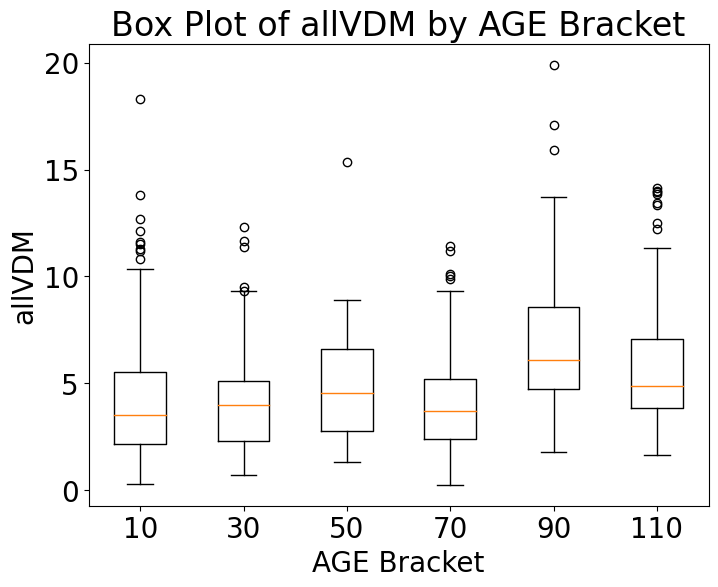

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot([group['allVDM'] for _, group in grouped], labels=[10,30,50,70,90,110], vert=True)
plt.xlabel('Age Bracket [Ma]')
plt.ylabel('allVDM')
plt.title('Box Plot of allVDM by AGE Bracket')
plt.show()

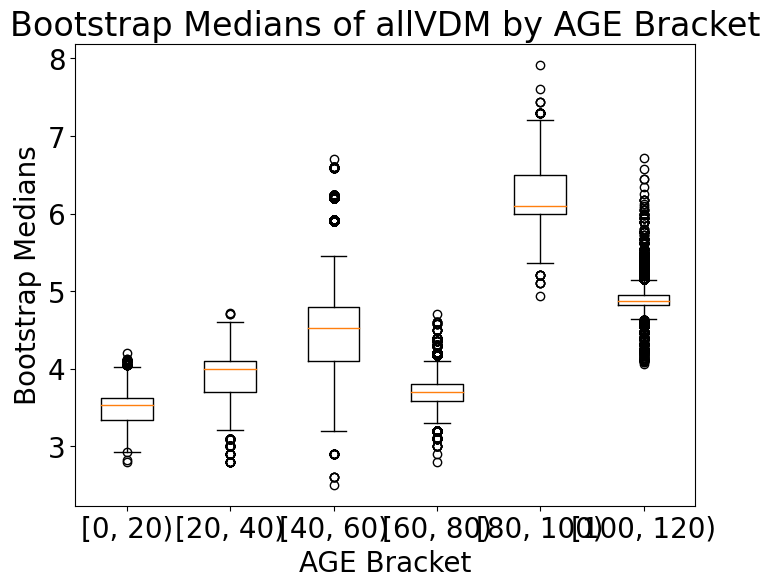

In [43]:
# Number of bootstrap samples
num_samples = 10000

# Function to calculate the median of a bootstrap sample
def calculate_bootstrap_median(sample):
    return np.median(np.random.choice(sample, size=len(sample)))

# Create an empty list to store bootstrap medians for each group
bootstrap_medians = []

# Perform bootstrapping for each group
for _, group in grouped:
    medians = []
    for _ in range(num_samples):
        resampled_median = calculate_bootstrap_median(group['allVDM'])
        medians.append(resampled_median)
    bootstrap_medians.append(medians)

# Create a box plot to visualize the distribution of bootstrap medians
plt.figure(figsize=(8, 6))
plt.boxplot(bootstrap_medians, labels=[str(group) for group, _ in grouped], vert=True)
plt.xlabel('AGE Bracket')
plt.ylabel('Bootstrap Medians')
plt.title('Bootstrap Medians of allVDM by AGE Bracket')
plt.show()

In [45]:
# Calculate the 95% confidence bounds on the median for each age bracket
confidence_bounds = []

for age_bracket, bootstrap_sample in zip(grouped.groups.keys(), bootstrap_medians):
    lower_bound = np.percentile(bootstrap_sample, 2.5)
    upper_bound = np.percentile(bootstrap_sample, 97.5)
    confidence_bounds.append((lower_bound, upper_bound))

# Print the confidence bounds for each age bracket
for age_bracket, (lower, upper) in zip(grouped.groups.keys(), confidence_bounds):
    print(f'Age Bracket {age_bracket}: 95% Confidence Interval for Median ({lower:.2f}, {upper:.2f})')


Age Bracket [0, 20): 95% Confidence Interval for Median (3.14, 3.84)
Age Bracket [20, 40): 95% Confidence Interval for Median (3.30, 4.30)
Age Bracket [40, 60): 95% Confidence Interval for Median (3.45, 6.20)
Age Bracket [60, 80): 95% Confidence Interval for Median (3.30, 4.20)
Age Bracket [80, 100): 95% Confidence Interval for Median (5.80, 7.10)
Age Bracket [100, 120): 95% Confidence Interval for Median (4.54, 5.41)


In [47]:
# Perform KS test for each pair of age brackets
p_values = {}

age_brackets = list(grouped.groups.keys())
for i in range(len(age_brackets)):
    for j in range(i + 1, len(age_brackets)):
        group1 = grouped.get_group(age_brackets[i])['allVDM']
        group2 = grouped.get_group(age_brackets[j])['allVDM']
        ks_statistic, p_value = ks_2samp(group1, group2)
        p_values[f'{age_brackets[i]} vs. {age_brackets[j]}'] = p_value

# Print the p-values for each pair of age brackets
for comparison, p_value in p_values.items():
    print(f'{comparison}: KS p-value = {p_value:.4f}')

[0, 20) vs. [20, 40): KS p-value = 0.5890
[0, 20) vs. [40, 60): KS p-value = 0.2393
[0, 20) vs. [60, 80): KS p-value = 0.4988
[0, 20) vs. [80, 100): KS p-value = 0.0000
[0, 20) vs. [100, 120): KS p-value = 0.0000
[20, 40) vs. [40, 60): KS p-value = 0.1598
[20, 40) vs. [60, 80): KS p-value = 0.9208
[20, 40) vs. [80, 100): KS p-value = 0.0000
[20, 40) vs. [100, 120): KS p-value = 0.0006
[40, 60) vs. [60, 80): KS p-value = 0.1312
[40, 60) vs. [80, 100): KS p-value = 0.0135
[40, 60) vs. [100, 120): KS p-value = 0.1204
[60, 80) vs. [80, 100): KS p-value = 0.0000
[60, 80) vs. [100, 120): KS p-value = 0.0000
[80, 100) vs. [100, 120): KS p-value = 0.0018


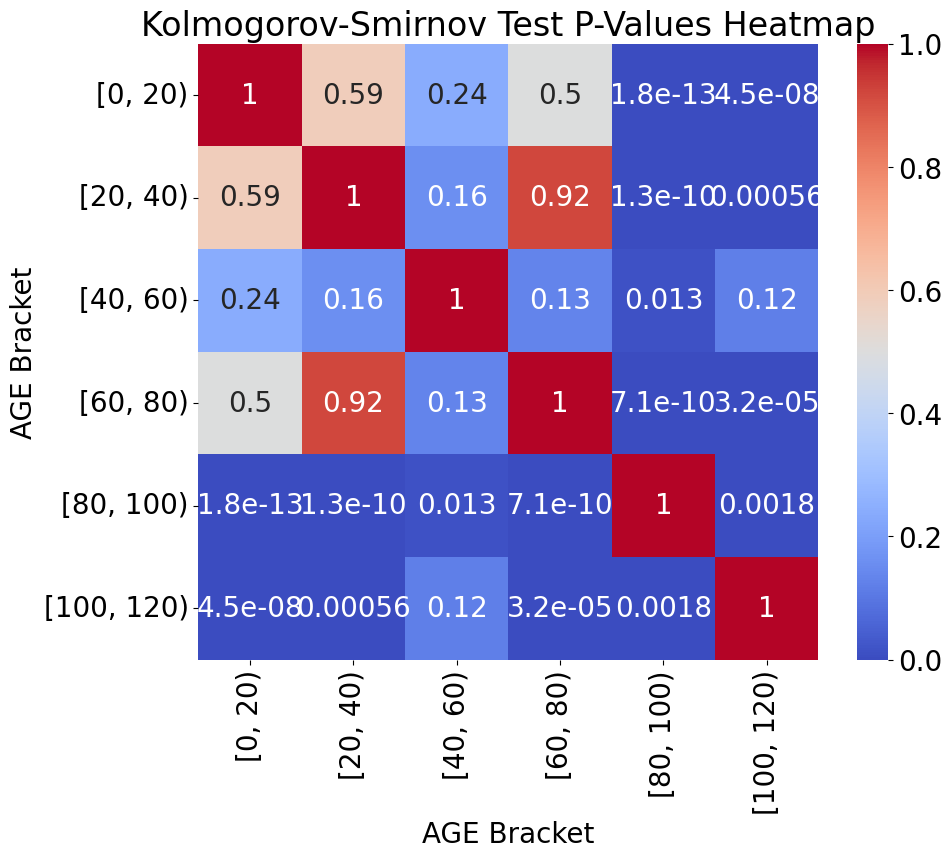

In [50]:
# Initialize an empty matrix to store p-values
n = len(grouped)
p_values_matrix = np.zeros((n, n))

# Perform KS test for each pair of age brackets
age_brackets = list(grouped.groups.keys())
for i in range(n):
    for j in range(i, n):
        group1 = grouped.get_group(age_brackets[i])['allVDM']
        group2 = grouped.get_group(age_brackets[j])['allVDM']
        ks_statistic, p_value = ks_2samp(group1, group2)
        p_values_matrix[i, j] = p_value
        p_values_matrix[j, i] = p_value  # Fill the lower triangle as well

# Create a heatmap of the p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', xticklabels=age_brackets, yticklabels=age_brackets)
plt.xlabel('AGE Bracket')
plt.ylabel('AGE Bracket')
plt.title('Kolmogorov-Smirnov Test P-Values Heatmap')
plt.show()

In [57]:
lowerAgeLimit = 5
upperAgeLimit = 500 #ma
QPIfilter = 3 #QPI score must be greater than or equal to filter


PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit) & (PINT['allVDM'].isna()==False)]


In [59]:
PINTselected['AGE_bracket'] = pd.cut(PINTselected['AGE'], bins=range(0, 500, 20), right=False)

# Group the DataFrame by the 'AGE_bracket' column
grouped = PINTselected.groupby('AGE_bracket')

# Calculate the median of the 'allVDM' column in each group
median_values = grouped['allVDM'].median()

# Calculate the quartiles in each group
q1 = grouped['allVDM'].quantile(0.25)
q3 = grouped['allVDM'].quantile(0.75)

# Calculate the interquartile range (IQR) in each group
iqr = q3 - q1

C:\Users\murray98\AppData\Local\Temp\ipykernel_9376\1469197434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PINTselected['AGE_bracket'] = pd.cut(PINTselected['AGE'], bins=range(0, 500, 20), right=False)


In [60]:
iqr

AGE_bracket
[0, 20)       3.348131
[20, 40)      2.803661
[40, 60)      3.844905
[60, 80)      2.814707
[80, 100)     3.845692
[100, 120)    3.208816
[120, 140)    3.887152
[140, 160)    2.072602
[160, 180)    1.750000
[180, 200)    2.815177
[200, 220)    1.396855
[220, 240)         NaN
[240, 260)    1.384619
[260, 280)    3.923091
[280, 300)    5.232234
[300, 320)    1.133970
[320, 340)    0.904267
[340, 360)    2.002060
[360, 380)    0.681015
[380, 400)    2.512144
[400, 420)    2.833862
[420, 440)         NaN
[440, 460)         NaN
[460, 480)         NaN
Name: allVDM, dtype: float64

In [58]:
PINTselected

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
16,17,9541,5,Achadzhur,41.000,45.000,86.0,4.00,Stratigraphy,Europe,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,6.50
17,18,9540,5,Sarigyukh,41.000,45.000,86.0,4.00,Stratigraphy,Europe,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,7.30
18,19,21,6,425,41.000,45.000,86.0,3.00,Stratigraphy,Europe,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,7.20
19,20,22,6,499,41.000,45.000,86.0,3.00,Stratigraphy,Europe,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.10
20,21,23,6,500,41.000,45.000,86.0,3.00,Stratigraphy,Europe,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,4655,NaN,783,CR03,10.571,-85.687,130.0,2.25,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,8.30
4644,4656,NaN,783,CR05,10.589,-85.680,112.4,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,5.32
4645,4657,NaN,783,CR06,10.588,-85.679,112.4,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,8.66
4646,4658,NaN,783,CR14,10.550,-85.707,135.1,0.75,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,8.84


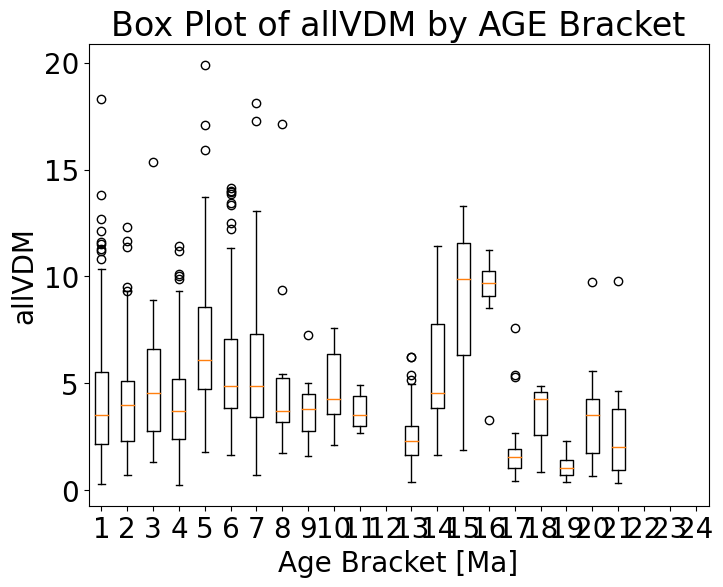

In [62]:
plt.figure(figsize=(8, 6))
plt.boxplot([group['allVDM'] for _, group in grouped], vert=True)
plt.xlabel('Age Bracket [Ma]')
plt.ylabel('allVDM')
plt.title('Box Plot of allVDM by AGE Bracket')
plt.show()

C:\Anaconda3\2021.11\envs\pmagpy_test_env\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda3\2021.11\envs\pmagpy_test_env\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


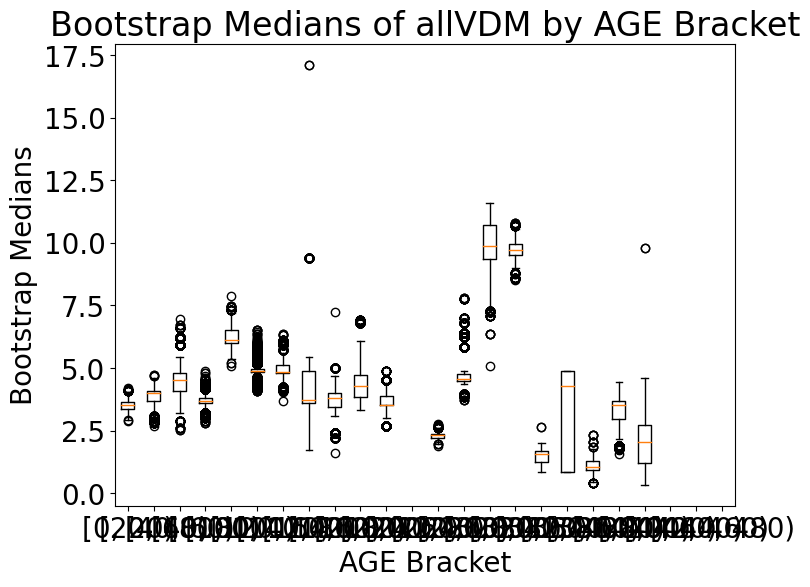

In [63]:
# Number of bootstrap samples
num_samples = 10000

# Function to calculate the median of a bootstrap sample
def calculate_bootstrap_median(sample):
    return np.median(np.random.choice(sample, size=len(sample)))

# Create an empty list to store bootstrap medians for each group
bootstrap_medians = []

# Perform bootstrapping for each group
for _, group in grouped:
    medians = []
    for _ in range(num_samples):
        resampled_median = calculate_bootstrap_median(group['allVDM'])
        medians.append(resampled_median)
    bootstrap_medians.append(medians)

# Create a box plot to visualize the distribution of bootstrap medians
plt.figure(figsize=(8, 6))
plt.boxplot(bootstrap_medians, labels=[str(group) for group, _ in grouped], vert=True)
plt.xlabel('AGE Bracket')
plt.ylabel('Bootstrap Medians')
plt.title('Bootstrap Medians of allVDM by AGE Bracket')
plt.show()

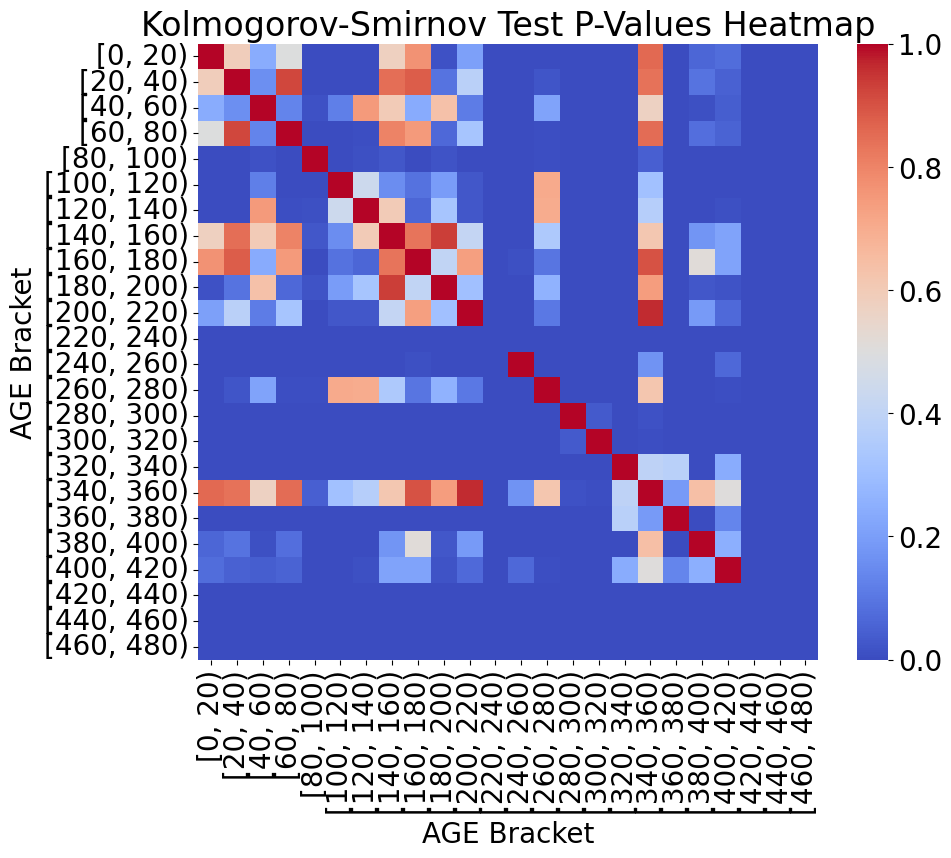

In [68]:
# Initialize an empty matrix to store p-values
n = len(grouped)
p_values_matrix = np.zeros((n, n))

# Perform KS test for each pair of age brackets
age_brackets = list(grouped.groups.keys())
for i in range(n):
    for j in range(i, n):
        try:
            group1 = grouped.get_group(age_brackets[i])['allVDM']
            group2 = grouped.get_group(age_brackets[j])['allVDM']
            ks_statistic, p_value = ks_2samp(group1, group2)
            p_values_matrix[i, j] = p_value
            p_values_matrix[j, i] = p_value  # Fill the lower triangle as well
        except:
            continue

# Create a heatmap of the p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=False, cmap='coolwarm', xticklabels=age_brackets, yticklabels=age_brackets)
plt.xlabel('AGE Bracket')
plt.ylabel('AGE Bracket')
plt.title('Kolmogorov-Smirnov Test P-Values Heatmap')
plt.show()